## 2e. Evidence - Understandability QAS Measurements.

Now we proceed to gather data about the Interpretability of the model, for the corresponding scenario.

### Initialize MLTE Context

MLTE contains a global context that manages the currently active _session_. Initializing the context tells MLTE how to store all of the artifacts that it produces. This import will also set up global constants related to folders and model to use.

In [1]:
# Sets up context for the model being used, sets up constants related to folders and model data to be used.
from demo.scenarios.session import *

Creating initial custom lists at URI: local:///Users/rbrowersinning/Documents/ResearchFolders/Continuum_LTP/GitRepos/mlte/demo/scenarios/../store
Loaded 7 qa_categories for initial list
Loaded 30 quality_attributes for initial list
Creating sample catalog at URI: StoreType.LOCAL_FILESYSTEM:local:///Users/rbrowersinning/Documents/ResearchFolders/Continuum_LTP/GitRepos/mlte/demo/scenarios/../store
Loading sample catalog entries.
Loaded 9 entries for sample catalog.


### Helper Functions

Functions to help, and data setup.

In [2]:
from demo.scenarios.model_analysis import *

# Load the model/
loaded_model = load_model(MODEL_FILE_PATH)

ValueError: File not found: filepath=/Users/rbrowersinning/Documents/ResearchFolders/Continuum_LTP/GitRepos/mlte/demo/scenarios/model/oxford_flower_model.keras. Please ensure the file is an accessible `.keras` zip file.

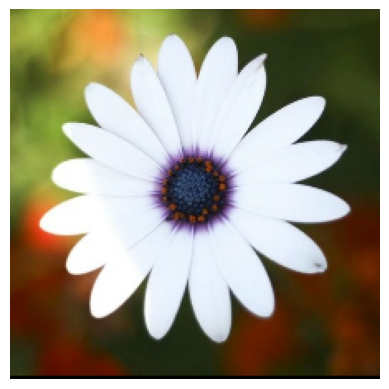

In [3]:
# Load and show the image.

flower_img = "flower3.jpg"  # Filename of flower image to use, public domain image adapted from: https://commons.wikimedia.org/wiki/File:Beautiful_white_flower_in_garden.jpg
flower_idx = (
    42  # Classifier index of associated flower (see OxfordFlower102Labels.csv)
)

im = read_image(os.path.join(SAMPLE_DATASET_DIR, flower_img))

plt.imshow(im)
plt.axis("off")
plt.show()

In [4]:
predictions = run_model(im, loaded_model)

baseline, alphas = generate_baseline_and_alphas()

NameError: name 'loaded_model' is not defined

In [5]:
interpolated_images = interpolate_images(
    baseline=baseline, image=im, alphas=alphas
)

NameError: name 'baseline' is not defined

In [6]:
fig = plt.figure(figsize=(20, 20))

i = 0
for alpha, image in zip(alphas[0::10], interpolated_images[0::10]):
    i += 1
    plt.subplot(1, len(alphas[0::10]), i)
    plt.title(f"alpha: {alpha:.1f}")
    plt.imshow(image)
    plt.axis("off")

plt.tight_layout()

NameError: name 'alphas' is not defined

<Figure size 2000x2000 with 0 Axes>

In [7]:
path_gradients = compute_gradients(
    loaded_model=loaded_model,
    images=interpolated_images,
    target_class_idx=flower_idx,
)
print(path_gradients.shape)

ig = integral_approximation(gradients=path_gradients)
print(ig.shape)

NameError: name 'loaded_model' is not defined

In [8]:
ig_attributions = integrated_gradients(
    baseline=baseline,
    image=im,
    target_class_idx=flower_idx,
    loaded_model=loaded_model,
    m_steps=240,
)
print(ig_attributions.shape)

NameError: name 'baseline' is not defined

### Measurements

Execute and store measurements.

In [9]:
fig = plot_img_attributions(
    image=im,
    baseline=baseline,
    target_class_idx=flower_idx,
    loaded_model=loaded_model,
    m_steps=240,
    cmap=plt.cm.inferno,
    overlay_alpha=0.4,
)

plt.savefig(MEDIA_DIR / "attributions.png")

NameError: name 'baseline' is not defined

In [10]:
from mlte.measurement.external_measurement import ExternalMeasurement
from mlte.evidence.types.image import Image

# Save to MLTE store.
img_collector = ExternalMeasurement("image attributions", Image)
img = img_collector.evaluate(MEDIA_DIR / "attributions.png")
img.save(force=True)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/rbrowersinning/Documents/ResearchFolders/Continuum_LTP/GitRepos/mlte/demo/scenarios/media/attributions.png'